In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Groceries_dataset[1].csv")

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808.0,21-07-2015,tropical fruit
1,2552.0,05-01-2015,whole milk
2,2300.0,19-09-2015,pip fruit
3,1187.0,12-12-2015,other vegetables
4,3037.0,01-02-2015,whole milk


In [4]:
df.shape

(38765, 3)

In [5]:
df.isna().sum()

Member_number      17
Date               14
itemDescription    27
dtype: int64

In [6]:
df=df.dropna(axis=0)
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

C:\Users\soham\AppData\Local\Temp\ipykernel_15696\3939965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')


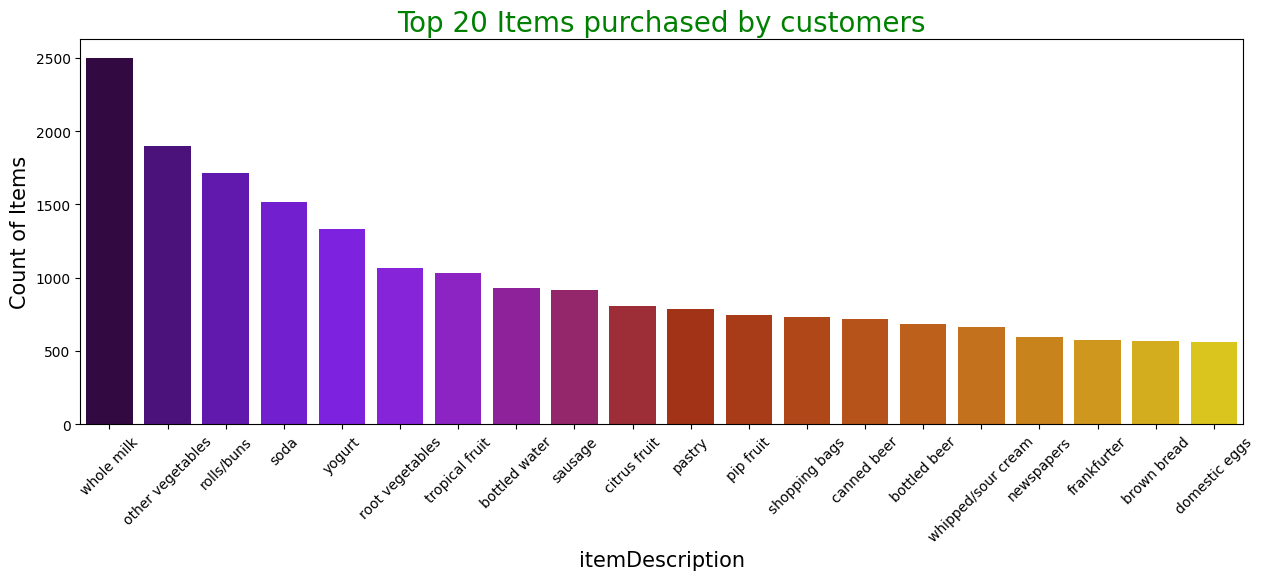

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [8]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2500
other vegetables         1897
rolls/buns               1714
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [9]:
#grouping columns form a list of products bought by same customer on same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [10]:

df.head(20)

Member_number  Date      
1000.0         15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
1001.0         02-05-2015                                  [frankfurter, curd]
               07-02-2014                    [sausage, whole milk, rolls/buns]
               12-12-2014                                   [whole milk, soda]
               14-04-2015                                  [beef, white bread]
               20-01-2015              [frankfurter, soda, whipped/sour cream]
1002.0         09-02-2014                [frozen vegetables, other vegetables]
               26-04-2014                                 [butter, whole milk]
               26-04-2015 

In [11]:
# getting error of series object cannot be maniulated convert back to dataframe
df = df.reset_index()

In [12]:
df.head()

,Member_number,Date,itemDescription
0,1000.0,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000.0,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000.0,24-07-2015,"[canned beer, misc. beverages]"
3,1000.0,25-11-2015,"[sausage, hygiene articles]"
4,1000.0,27-05-2015,"[soda, pickled vegetables]"


In [13]:
df_exploded = df.explode('itemDescription')
df_exploded.head()

,Member_number,Date,itemDescription
0,1000.0,15-03-2015,sausage
0,1000.0,15-03-2015,whole milk
0,1000.0,15-03-2015,semi-finished bread
0,1000.0,15-03-2015,yogurt
1,1000.0,24-06-2014,whole milk


In [14]:
print(df_exploded.columns)

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


In [15]:
basket = (df_exploded
          .groupby(['Member_number', 'Date', 'itemDescription'])['itemDescription']
          .count().unstack().reset_index().fillna(0)
          .set_index(['Member_number', 'Date']))

In [16]:
basket.head(20)

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000.0        15-03-2015                    0.0       0.0               0.0   
              24-06-2014                    0.0       0.0               0.0   
              24-07-2015                    0.0       0.0               0.0   
              25-11-2015                    0.0       0.0               0.0   
              27-05-2015                    0.0       0.0               0.0   
1001.0        02-05-2015                    0.0       0.0               0.0   
              07-02-2014                    0.0       0.0               0.0   
              12-12-2014                    0.0       0.0               0.0   
              14-04-2015                    0.0       0.0               0.0   
              20-01-2015                    0.0       0.0               0.0   
1002.0        09-02-2014                    0.0       0.0               0.0   
              26-04-2014                    0.0       0.0               0.0   
              26-04-2015                    0.0       0.0               0.0   
              30-08-2015                    0.0       0.0               0.0   
1003.0        10-02-2015                    0.0       0.0               0.0   
              15-10-2014                    0.0       0.0               0.0   
              19-01-2014                    0.0       0.0               0.0   
              27-02-2014                    0.0       0.0               0.0   
1004.0        01-05-2014                    0.0       0.0               0.0   
              01-07-2014                    0.0       0.0               0.0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000.0        15-03-2015               0.0             0.0   0.0   
              24-06-2014               0.0             0.0   0.0   
              24-07-2015               0.0             0.0   0.0   
              25-11-2015               0.0             0.0   0.0   
              27-05-2015               0.0             0.0   0.0   
1001.0        02-05-2015               0.0             0.0   0.0   
              07-02-2014               0.0             0.0   0.0   
              12-12-2014               0.0             0.0   0.0   
              14-04-2015               0.0             0.0   0.0   
              20-01-2015               0.0             0.0   0.0   
1002.0        09-02-2014               0.0             0.0   0.0   
              26-04-2014               0.0             0.0   0.0   
              26-04-2015               0.0             0.0   0.0   
              30-08-2015               0.0             0.0   0.0   
1003.0        10-02-2015               0.0             0.0   0.0   
              15-10-2014               0.0             0.0   0.0   
              19-01-2014               0.0             0.0   0.0   
              27-02-2014               0.0             0.0   0.0   
1004.0        01-05-2014               0.0             0.0   0.0   
              01-07-2014               0.0             0.0   0.0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000.0        15-03-2015            0.0               0.0   0.0      0.0  ...   
              24-06-2014            0.0               0.0   0.0      0.0  ...   
              24-07-2015            0.0               0.0   0.0      0.0  ...   
              25-11-2015            0.0               0.0   0.0      0.0  ...   
              27-05-2015            0.0               0.0   0.0      0.0  ...   
1001.0        02-05-2015            0.0               0.0   0.0      0.0  ...   
              07-02-2014            0.0               0.0   0.0      0.0  ...   
              12-12-2014           

In [17]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\soham\AppData\Local\Temp\ipykernel_15696\3498954818.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [18]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14963 entries, (1000.0, '15-03-2015') to (5000.0, '16-11-2014')
Columns: 167 entries, Instant food products to zwieback
dtypes: int64(167)
memory usage: 19.3+ MB


In [19]:
basket.head()

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000.0        15-03-2015                      0         0                 0   
              24-06-2014                      0         0                 0   
              24-07-2015                      0         0                 0   
              25-11-2015                      0         0                 0   
              27-05-2015                      0         0                 0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000.0        15-03-2015                 0               0     0   
              24-06-2014                 0               0     0   
              24-07-2015                 0               0     0   
              25-11-2015                 0               0     0   
              27-05-2015                 0               0     0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000.0        15-03-2015              0                 0     0        0  ...   
              24-06-2014              0                 0     0        0  ...   
              24-07-2015              0                 0     0        0  ...   
              25-11-2015              0                 0     0        0  ...   
              27-05-2015              0                 0     0        0  ...   

itemDescription           turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date                                                       
1000.0        15-03-2015       0        0        0                   0   
              24-06-2014       0        0        0                   0   
              24-07-2015       0        0        0                   0   
              25-11-2015       0        0        0                   0   
              27-05-2015       0        0        0                   0   

itemDescription           whisky  white bread  white wine  whole milk  yogurt  \
Member_number Date                                                              
1000.0        15-03-2015       0            0           0           1       1   
              24-06-2014       0            0           0           1       0   
              24-07-2015       0            0           0           0       0   
              25-11-2015       0            0           0           0       0   
              27-05-2015       0            0           0           0       0   

itemDescription           zwieback  
Member_number Date                  
1000.0        15-03-2015         0  
              24-06-2014         0  
              24-07-2015         0  
              25-11-2015         0  
              27-05-2015         0  

[5 rows x 167 columns]

# How Apriori works ?

### Support:

The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :


<img src='download1.png'>

Support indicates how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

<img src='download1.webp'>

<p style="color:red">If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.</p>

### Confidence:

This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1. ( Assume I1 as X , I2 as Y )

<img src='download2.png'>

Confidence says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

<img src='download3.webp'>

<p style="color:red">One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.</p>

### Lift:

Lift is the ratio between the confidence and support.

Lift says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought. ( here X represents apple and Y represents beer )

<img src='download4.webp'>



In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
frequent_itemsets = apriori(basket, min_support=0.0003, use_colnames=True)

C:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [23]:
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)

Frequent Itemsets:
        support                                      itemsets
0     0.004010                       (Instant food products)
1     0.021386                                    (UHT-milk)
2     0.001470                            (abrasive cleaner)
3     0.001938                            (artif. sweetener)
4     0.008087                               (baking powder)
...        ...                                           ...
2387  0.000936                    (whole milk, soda, yogurt)
2388  0.000802          (yogurt, whole milk, tropical fruit)
2389  0.000334      (whole milk, whipped/sour cream, yogurt)
2390  0.000334  (other vegetables, pastry, whole milk, soda)
2391  0.000334     (whole milk, rolls/buns, sausage, yogurt)

[2392 rows x 2 columns]

Association Rules:
                   antecedents                        consequents  \
0     (Instant food products)                  (root vegetables)   
1           (root vegetables)            (Instant food products)  

In [24]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

rules_df = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules_df

,antecedents,consequents,support,confidence,lift
0,Instant food products,root vegetables,0.000401,0.100000,1.440135
1,root vegetables,Instant food products,0.000401,0.005775,1.440135
2,UHT-milk,butter milk,0.000601,0.028125,1.600131
3,butter milk,UHT-milk,0.000601,0.034221,1.600131
4,candy,UHT-milk,0.000334,0.023256,1.087427
...,...,...,...,...,...
2699,"sausage, yogurt","whole milk, rolls/buns",0.000334,0.058140,4.162401
2700,whole milk,"rolls/buns, sausage, yogurt",0.000334,0.002118,3.520872
2701,rolls/buns,"whole milk, sausage, yogurt",0.000334,0.003041,2.068541
2702,sausage,"whole milk, rolls/buns, yogurt",0.000334,0.005568,4.165646
